# Gradient Boost - Basic Steps with simple example

In [9]:
import numpy as np
import pandas as pd

pd.set_option('display.precision',2)
df0 = pd.DataFrame({
    "Height" : [1.6, 1.6, 1.5, 1.8, 1.5, 1.4],
    "Fav Color": ["Blue", "Green", "Blue", "Red", "Green", "Blue"],
    "Gender": ["Male", "Female", "Female", "Male", "Male", "Female"],
    "Weight": [88, 76, 56, 73, 77, 57]
})
df0

,Height,Fav Color,Gender,Weight
0,1.6,Blue,Male,88
1,1.6,Green,Female,76
2,1.5,Blue,Female,56
3,1.8,Red,Male,73
4,1.5,Green,Male,77
5,1.4,Blue,Female,57


In [14]:
# one hot encoding of categorical columns
df = pd.get_dummies(df0)
df.drop(columns=['Gender_Female'],inplace=True)
df = df[['Height', 'Fav Color_Blue', 'Fav Color_Green', 'Fav Color_Red', 'Gender_Male', 'Weight']] # little rearrangement
df

,Height,Fav Color_Blue,Fav Color_Green,Fav Color_Red,Gender_Male,Weight
0,1.6,True,False,False,True,88
1,1.6,False,True,False,False,76
2,1.5,True,False,False,False,56
3,1.8,False,False,True,True,73
4,1.5,False,True,False,True,77
5,1.4,True,False,False,False,57


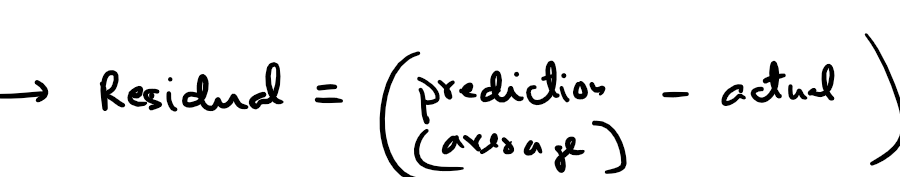

In [15]:
pred_0 = df['Weight'].mean()
df['pred'] = pred_0
df

,Height,Fav Color_Blue,Fav Color_Green,Fav Color_Red,Gender_Male,Weight,pred
0,1.6,True,False,False,True,88,71.17
1,1.6,False,True,False,False,76,71.17
2,1.5,True,False,False,False,56,71.17
3,1.8,False,False,True,True,73,71.17
4,1.5,False,True,False,True,77,71.17
5,1.4,True,False,False,False,57,71.17


In [16]:
df['residual'] = df['Weight']-df['pred']

In [20]:
# make a tree of small size to fit predict the residual
treeForest = {}

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
tr = DecisionTreeRegressor(max_leaf_nodes=4)

x = np.array(df[['Height','Fav Color_Blue', 'Fav Color_Green', 'Fav Color_Red', 'Gender_Male']])
y = np.array(df['residual'])

tr.fit(x,y)

DecisionTreeRegressor(max_leaf_nodes=4)

In [21]:
# save the tree in the dictionary
treeForest[1] = tr

In [22]:
# new prediction
df['pred_new'] = df['pred'] + 0.1*tr.predict(x)
df

,Height,Fav Color_Blue,Fav Color_Green,Fav Color_Red,Gender_Male,Weight,pred,residual,pred_new
0,1.6,True,False,False,True,88,71.17,16.83,72.85
1,1.6,False,True,False,False,76,71.17,4.83,71.65
2,1.5,True,False,False,False,56,71.17,-15.17,69.70
3,1.8,False,False,True,True,73,71.17,1.83,71.55
4,1.5,False,True,False,True,77,71.17,5.83,71.55
5,1.4,True,False,False,False,57,71.17,-14.17,69.70


In [23]:
# check for loss
from sklearn.metrics import mean_squared_error
mean_squared_error(df['Weight'],df['pred_new'])


104.87166666666661

In [26]:
# redo the whole thing again
df['pred'] = df['pred_new']
df.drop(columns = ['pred_new'],inplace=True)

In [27]:
df['residual'] = df['Weight']-df['pred']
df

,Height,Fav Color_Blue,Fav Color_Green,Fav Color_Red,Gender_Male,Weight,pred,residual
0,1.6,True,False,False,True,88,72.85,15.15
1,1.6,False,True,False,False,76,71.65,4.35
2,1.5,True,False,False,False,56,69.70,-13.70
3,1.8,False,False,True,True,73,71.55,1.45
4,1.5,False,True,False,True,77,71.55,5.45
5,1.4,True,False,False,False,57,69.70,-12.70


In [30]:
from sklearn import tree
tr = DecisionTreeRegressor(max_leaf_nodes=4)

x = np.array(df[['Height','Fav Color_Blue', 'Fav Color_Green', 'Fav Color_Red', 'Gender_Male']])
y = np.array(df['residual'])

tr.fit(x,y)

# save the tree in the dictionary
treeForest[2] = tr

# new prediction
df['pred_new'] = df['pred'] + 0.1*tr.predict(x)

print("mean squared error = ", mean_squared_error(df['Weight'],df['pred_new']))

# redo the whole thing again
df['pred'] = df['pred_new']
df.drop(columns = ['pred_new'],inplace=True)

df['residual'] = df['Weight']-df['pred']
df


mean squared error =  85.21521666666656


,Height,Fav Color_Blue,Fav Color_Green,Fav Color_Red,Gender_Male,Weight,pred,residual
0,1.6,True,False,False,True,88,74.37,13.63
1,1.6,False,True,False,False,76,72.09,3.91
2,1.5,True,False,False,False,56,68.38,-12.38
3,1.8,False,False,True,True,73,71.90,1.10
4,1.5,False,True,False,True,77,71.90,5.10
5,1.4,True,False,False,False,57,68.38,-11.38


In [31]:
# one more time

from sklearn import tree
tr = DecisionTreeRegressor(max_leaf_nodes=4)

x = np.array(df[['Height','Fav Color_Blue', 'Fav Color_Green', 'Fav Color_Red', 'Gender_Male']])
y = np.array(df['residual'])

tr.fit(x,y)

# save the tree in the dictionary
treeForest[3] = tr

# new prediction
df['pred_new'] = df['pred'] + 0.1*tr.predict(x)

print("mean squared error = ", mean_squared_error(df['Weight'],df['pred_new']))

# redo the whole thing again
df['pred'] = df['pred_new']
df.drop(columns = ['pred_new'],inplace=True)

df['residual'] = df['Weight']-df['pred']
df

mean squared error =  69.29349216666655


,Height,Fav Color_Blue,Fav Color_Green,Fav Color_Red,Gender_Male,Weight,pred,residual
0,1.6,True,False,False,True,88,75.73,12.27
1,1.6,False,True,False,False,76,72.48,3.52
2,1.5,True,False,False,False,56,67.19,-11.19
3,1.8,False,False,True,True,73,72.21,0.79
4,1.5,False,True,False,True,77,72.21,4.79
5,1.4,True,False,False,False,57,67.19,-10.19


In [32]:
# one more time

from sklearn import tree
tr = DecisionTreeRegressor(max_leaf_nodes=4)

x = np.array(df[['Height','Fav Color_Blue', 'Fav Color_Green', 'Fav Color_Red', 'Gender_Male']])
y = np.array(df['residual'])

tr.fit(x,y)

# save the tree in the dictionary
treeForest[4] = tr

# new prediction
df['pred_new'] = df['pred'] + 0.1*tr.predict(x)

print("mean squared error = ", mean_squared_error(df['Weight'],df['pred_new']))

# redo the whole thing again
df['pred'] = df['pred_new']
df.drop(columns = ['pred_new'],inplace=True)

df['residual'] = df['Weight']-df['pred']
df

mean squared error =  56.39689532166661


,Height,Fav Color_Blue,Fav Color_Green,Fav Color_Red,Gender_Male,Weight,pred,residual
0,1.6,True,False,False,True,88,76.96,11.04
1,1.6,False,True,False,False,76,72.83,3.17
2,1.5,True,False,False,False,56,66.12,-10.12
3,1.8,False,False,True,True,73,72.48,0.52
4,1.5,False,True,False,True,77,72.48,4.52
5,1.4,True,False,False,False,57,66.12,-9.12


In [33]:
treeForest

{1: DecisionTreeRegressor(max_leaf_nodes=4),
 2: DecisionTreeRegressor(max_leaf_nodes=4),
 3: DecisionTreeRegressor(max_leaf_nodes=4),
 4: DecisionTreeRegressor(max_leaf_nodes=4)}

In [34]:
# 10 more times

for i in range(5,15):
    from sklearn import tree
    tr = DecisionTreeRegressor(max_leaf_nodes=4)

    x = np.array(df[['Height','Fav Color_Blue', 'Fav Color_Green', 'Fav Color_Red', 'Gender_Male']])
    y = np.array(df['residual'])

    tr.fit(x,y)

    # save the tree in the dictionary
    treeForest[i] = tr

    # new prediction
    df['pred_new'] = df['pred'] + 0.1*tr.predict(x)

    print("mean squared error = ", mean_squared_error(df['Weight'],df['pred_new']))

    # redo the whole thing again
    df['pred'] = df['pred_new']
    df.drop(columns = ['pred_new'],inplace=True)

    df['residual'] = df['Weight']-df['pred']
    
df

mean squared error =  45.95065187721659
mean squared error =  37.489194687212105
mean squared error =  30.635414363308456
mean squared error =  25.083852300946504
mean squared error =  20.538506346400283
mean squared error =  16.83723773527979
mean squared error =  13.80278210918352
mean squared error =  11.331541998995482
mean squared error =  9.302461034675526
mean squared error =  7.6499260862315


,Height,Fav Color_Blue,Fav Color_Green,Fav Color_Red,Gender_Male,Weight,pred,residual
0,1.6,True,False,False,True,88,83.81,4.19
1,1.6,False,True,False,False,76,74.89,1.11
2,1.5,True,False,False,False,56,59.86,-3.86
3,1.8,False,False,True,True,73,73.54,-0.54
4,1.5,False,True,False,True,77,75.04,1.96
5,1.4,True,False,False,False,57,59.86,-2.86


In [36]:
# 10 more time

for i in range(15,25):
    from sklearn import tree
    tr = DecisionTreeRegressor(max_leaf_nodes=4)

    x = np.array(df[['Height','Fav Color_Blue', 'Fav Color_Green', 'Fav Color_Red', 'Gender_Male']])
    y = np.array(df['residual'])

    tr.fit(x,y)

    # save the tree in the dictionary
    treeForest[i] = tr

    # new prediction
    df['pred_new'] = df['pred'] + 0.1*tr.predict(x)

    print("mean squared error = ", mean_squared_error(df['Weight'],df['pred_new']))

    # redo the whole thing again
    df['pred'] = df['pred_new']
    df.drop(columns = ['pred_new'],inplace=True)

    df['residual'] = df['Weight']-df['pred']
    
df

mean squared error =  6.290750694762913
mean squared error =  5.183871156757724
mean squared error =  4.271726810163881
mean squared error =  3.5290388963148054
mean squared error =  2.9156735784368943
mean squared error =  2.4164328649107074
mean squared error =  2.003101008027617
mean squared error =  1.6668597499949704
mean squared error =  1.3876958074905097
mean squared error =  1.1607789631157677


,Height,Fav Color_Blue,Fav Color_Green,Fav Color_Red,Gender_Male,Weight,pred,residual
0,1.6,True,False,False,True,88,86.30,1.70
1,1.6,False,True,False,False,76,75.61,0.39
2,1.5,True,False,False,False,56,57.67,-1.67
3,1.8,False,False,True,True,73,73.45,-0.45
4,1.5,False,True,False,True,77,76.30,0.70
5,1.4,True,False,False,False,57,57.67,-0.67
